In [67]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def get_jpeg_files():
    os.getcwd()
    os.listdir()
    path=r"C:\Users\hakan\Görüntü İşleme"
    jpg_files = [f for f in os.listdir(path) if f.endswith('.jpg')]
    return jpg_files

def rotate_one_point_with_theta_counterclockwise(point,angle):
    ...
 point : a pair of x,y indicating the location of the pixel
 angle : angle of degrees
    ...
    
    theta = np.radians(angle)
    matris = np.array(( (np.cos(theta),-np.sin(theta)) , (np.sin(theta),np.cos(theta)) ))
    nokta = np.array(point)
    
    return matris.dot(nokta).astype(int)

def get_all_new_location(img1,angle):
    
    m,n,k=img1.shape
    new_location_points=[]
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_one_point_with_theta_counterclockwise([i,j],angle))
    
    return new_location_points

def get_min_max(new_location_points):
    
    min_x,min_y=new_location_points[0][0],new_location_points[0][1]
    max_x,max_y=new_location_points[0][0],new_location_points[0][1]
    
    s1=len(new_location_points)
    for s in range(s1):
        if min_x > new_location_points[s][0]:
            min_x = new_location_points[s][0]
        if max_x < new_location_points[s][0]:
            max_x = new_location_points[s][0]
            
        if min_y > new_location_points[s][1]:
            min_y = new_location_points[s][1]
        if max_y < new_location_points[s][1]:
            max_y = new_location_points[s][1]
    
    return min_x,min_y,max_x,max_y

def rotate_an_image(img1,angle):
    m,n,k=img1.shape
    new_location_points=get_all_new_location(img1,angle)
    min_x,min_y,max_x,max_y=get_min_max(new_location_points)
    
    new_m = max_x - min_x + 1
    new_n = max_y - min_y + 1
    
    x_offset = 0 - min_x
    y_offset = 0 - min_y
    
    new_image=np.zeros((new_m,new_n,3),dtype='uint8')
    
    for i in range(m):
        for j in range(n):
            new_i,new_j=rotate_one_point_with_theta_counterclockwise([i,j],angle)
            new_image[ new_i+x_offset , new_j+y_offset ] = image[i,j]
            
    return new_image

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [75]:
get_jpeg_files()

['cameraman.jpg', 'indir_bw.jpg', 'indir_gray.jpg', 'penguen.jpg']

In [76]:
new_location_points=get_all_new_location(image,90)
min_x,min_y,max_x,max_y=get_min_max(new_location_points)
rotate_one_point_with_theta_counterclockwise([0,1],90)

array([-1,  0])

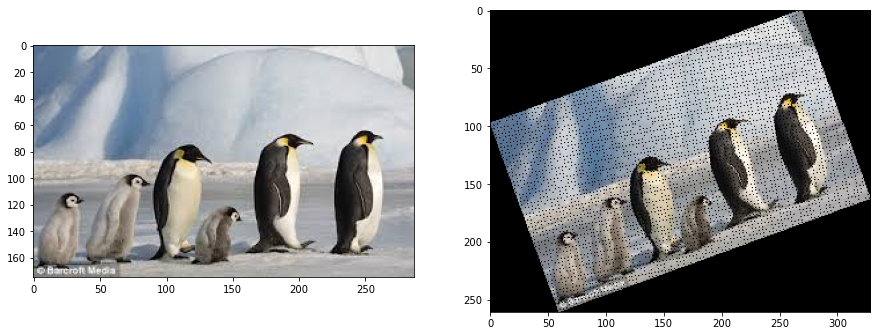

In [77]:
os.chdir(r'C:\Users\hakan\Görüntü İşleme')

image = plt.imread('penguen.jpg')
sonuc = rotate_an_image(image,20)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.imshow(image)
plt.subplot(1,2,2),plt.imshow(sonuc)
plt.show()
